In [72]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# MLflow
import mlflow
import mlflow.sklearn


# Load the dataset
df = pd.read_csv("medical_insurance.csv")

# View the first few rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [57]:
#Check the structure:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [58]:
# Check missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [59]:
# Chec# Check duplicates
df.duplicated().sum()


np.int64(1435)

In [60]:
#There was Duplicate values are avaialble 
df.drop_duplicates(inplace=True)

In [61]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

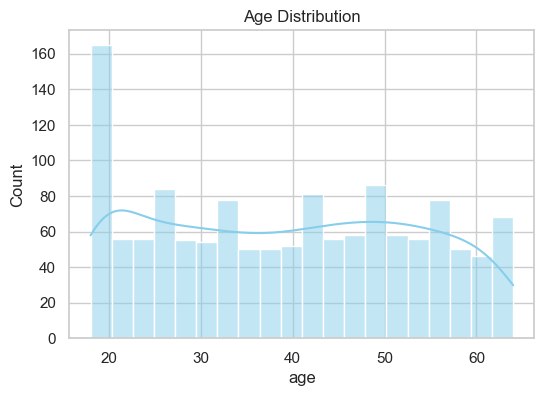

In [ ]:
# Basic inspection

sns.set(style="whitegrid")

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

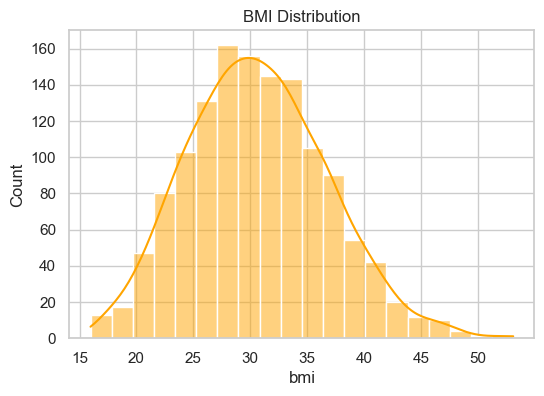

In [63]:
# BMI distribution
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], bins=20, kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

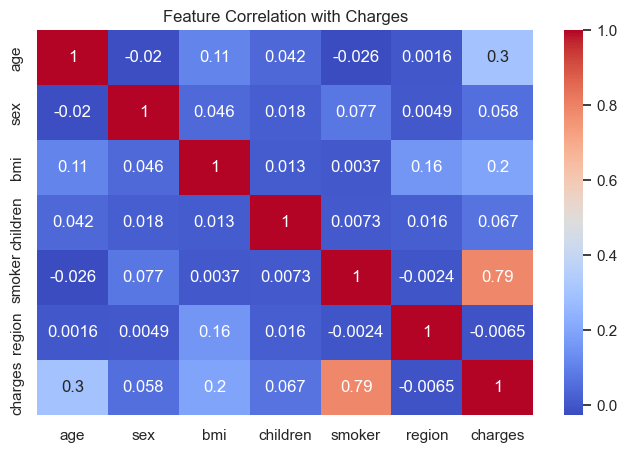

In [68]:
# Correlation Matrix (to see relationships)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Charges")
plt.show()


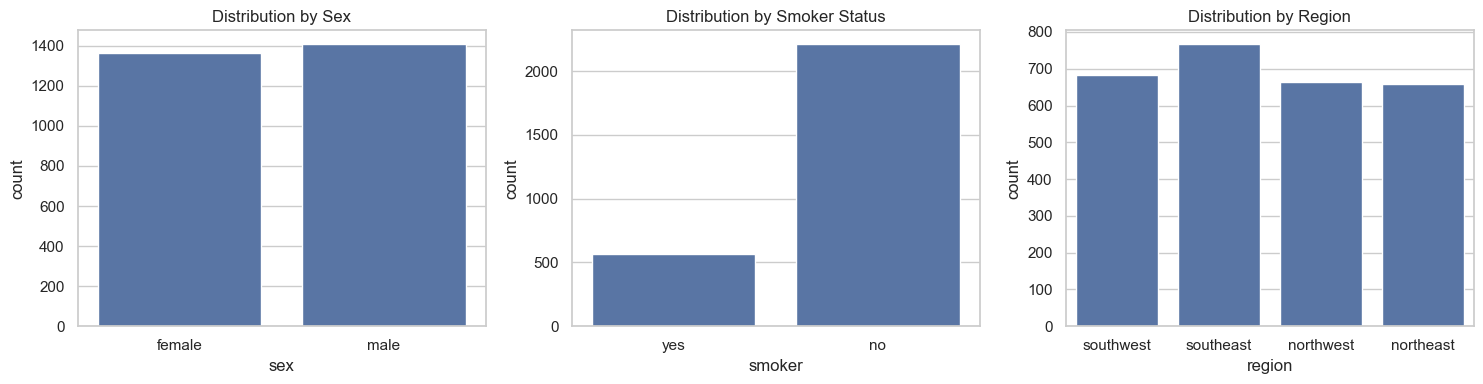

In [73]:
# Countplots for categorical features
df.columns = df.columns.str.lower().str.strip()
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.countplot(x='sex', data=df, ax=axes[0]).set_title('Distribution by Sex')
sns.countplot(x='smoker', data=df, ax=axes[1]).set_title('Distribution by Smoker Status')
sns.countplot(x='region', data=df, ax=axes[2]).set_title('Distribution by Region')
plt.tight_layout()
plt.show()

🔍 EDA Questions for Analysis

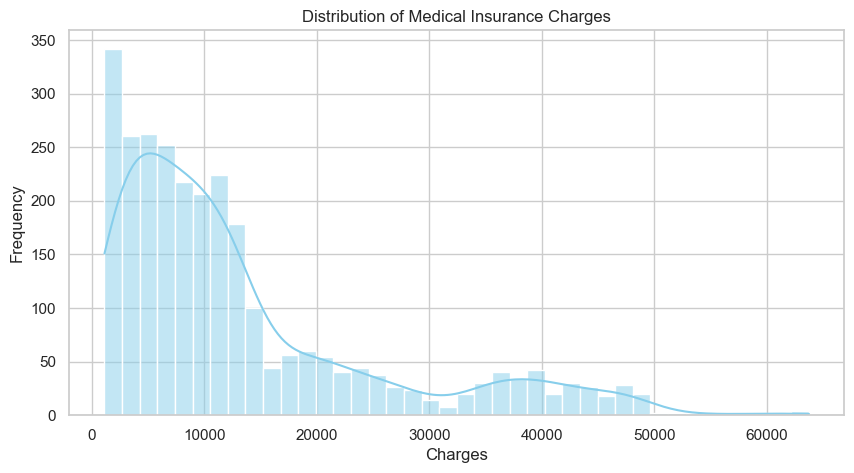

In [80]:
#What is the distribution of medical insurance charges?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['charges'], bins=40, kde=True, color='skyblue')
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


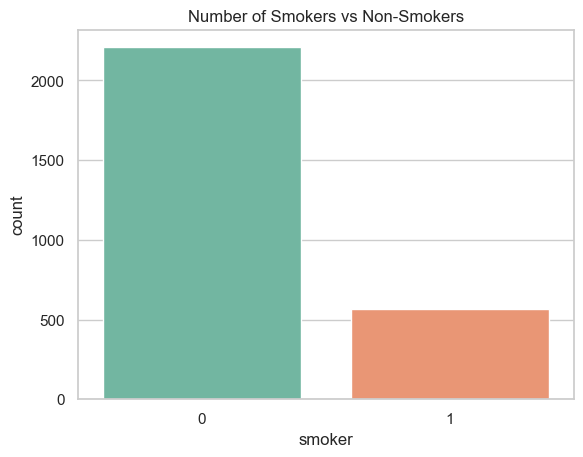

In [81]:
# How many people are smokers vs non-smokers?
sns.countplot(x='smoker', data=df, palette='Set2')
plt.title("Number of Smokers vs Non-Smokers")
plt.show()



In [82]:
# What is the average BMI in the dataset?
avg_bmi = df['bmi'].mean()
print(f"Average BMI: {avg_bmi:.2f}")


Average BMI: 30.70


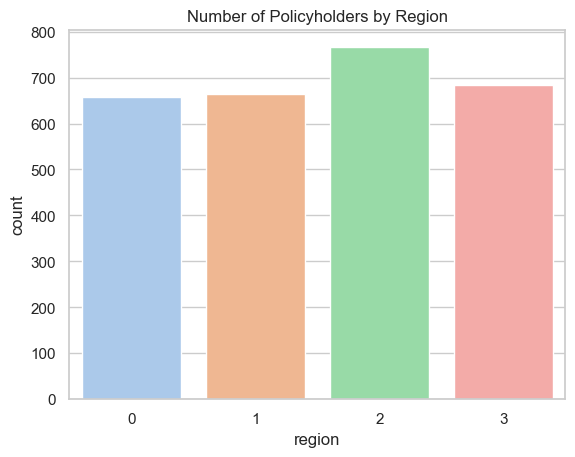

region
2    766
3    684
1    664
0    658
Name: count, dtype: int64

In [83]:
# Which regions have the most number of policyholders?

sns.countplot(x='region', data=df, palette='pastel')
plt.title("Number of Policyholders by Region")
plt.show()

# Numerical counts
df['region'].value_counts()


Bivariate Analysis (Two Variables):

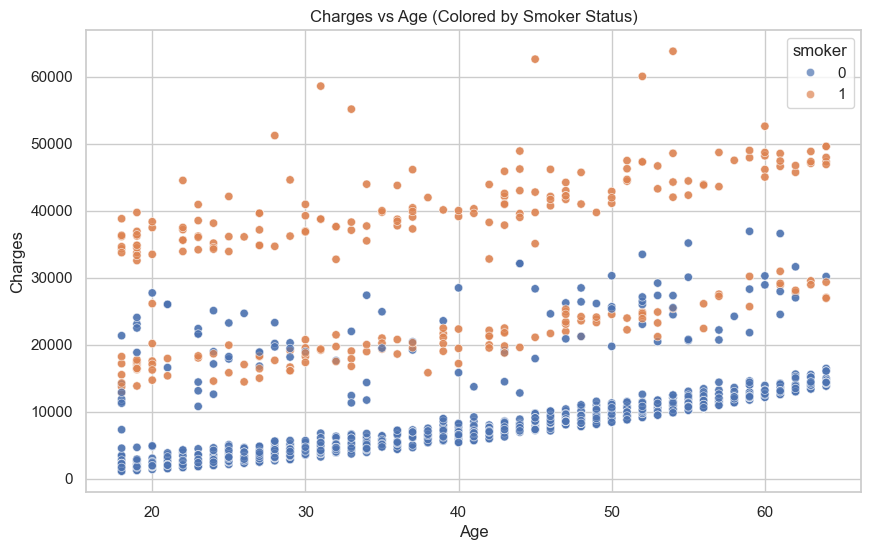

In [ ]:
# How do charges vary with age?

plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("Charges vs Age (Colored by Smoker Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

smoker
0     8417.874411
1    32223.139764
Name: charges, dtype: float64


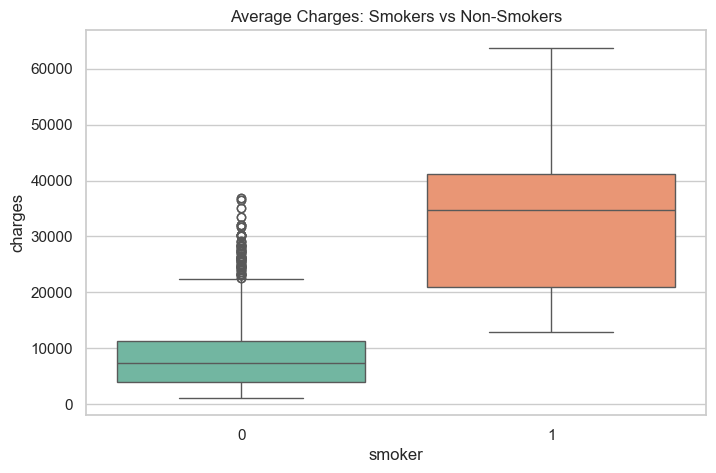

In [85]:
# Is there a difference in average charges between smokers and non-smokers?

avg_charges_smoker = df.groupby('smoker')['charges'].mean()
print(avg_charges_smoker)

# Boxplot for visual
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title("Average Charges: Smokers vs Non-Smokers")
plt.show()


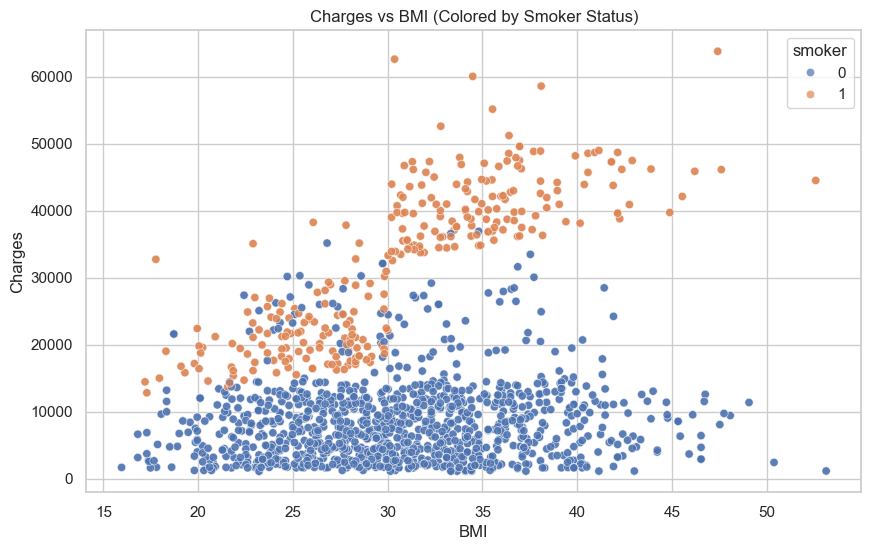

In [86]:
# Does BMI impact insurance charges?

plt.figure(figsize=(10,6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title("Charges vs BMI (Colored by Smoker Status)")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()


bmi_cat
Normal         10218.519127
Obese          15565.167477
Overweight     11015.813017
Underweight     8852.200585
Name: charges, dtype: float64


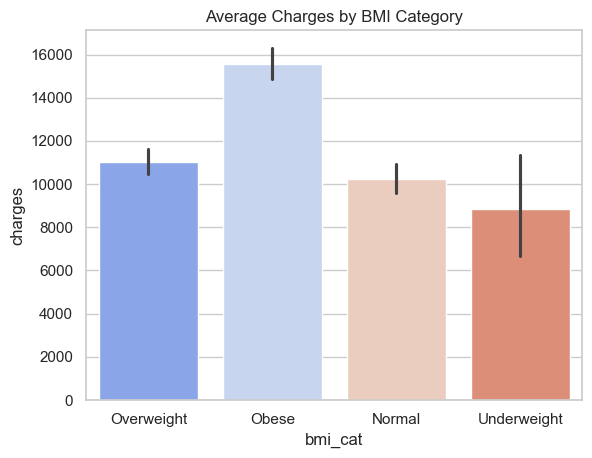

In [88]:
#Do men or women pay more on average?
def bmi_category(bmi):
    if bmi < 18.5: return 'Underweight'
    if bmi < 25: return 'Normal'
    if bmi < 30: return 'Overweight'
    return 'Obese'

df['bmi_cat'] = df['bmi'].apply(bmi_category)
avg_bmi_charges = df.groupby('bmi_cat')['charges'].mean()
print(avg_bmi_charges)

sns.barplot(x='bmi_cat', y='charges', data=df, palette='coolwarm')
plt.title("Average Charges by BMI Category")
plt.show()



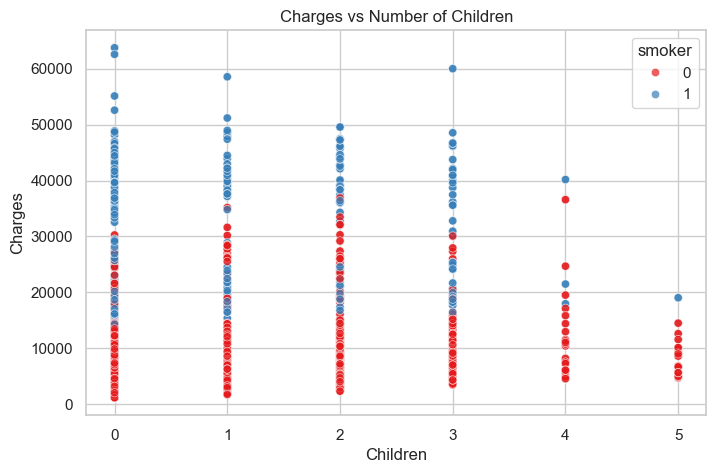

Correlation between children and charges: 0.07


In [90]:
# Is there a correlation between the number of children and the insurance charges?
plt.figure(figsize=(8,5))
sns.scatterplot(x='children', y='charges', data=df, hue='smoker', palette='Set1', alpha=0.7)
plt.title("Charges vs Number of Children")
plt.xlabel("Children")
plt.ylabel("Charges")
plt.show()

# Correlation value
corr_children_charges = df['children'].corr(df['charges'])
print(f"Correlation between children and charges: {corr_children_charges:.2f}")



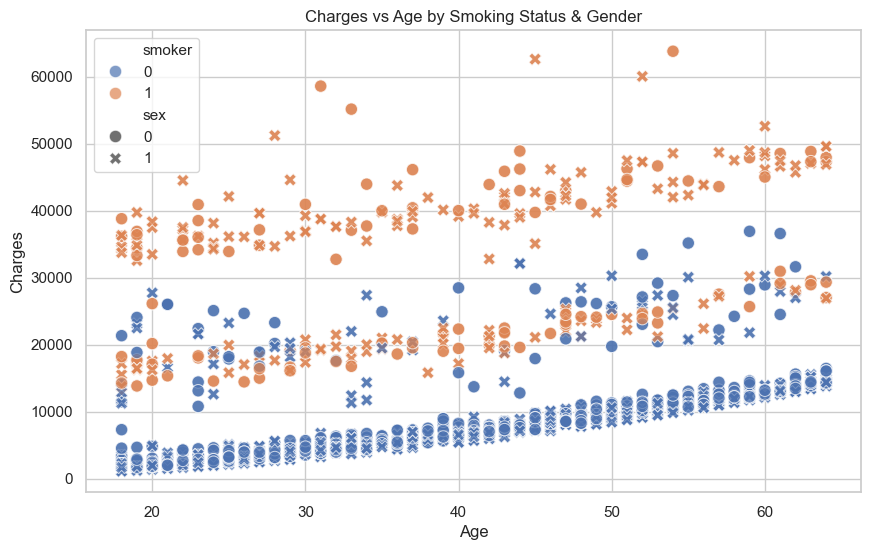

In [ ]:
#How does smoking status combined with age affect medical charges?
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='smoker', style='sex', data=df, alpha=0.7, s=80)
plt.title("Charges vs Age by Smoking Status & Gender")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


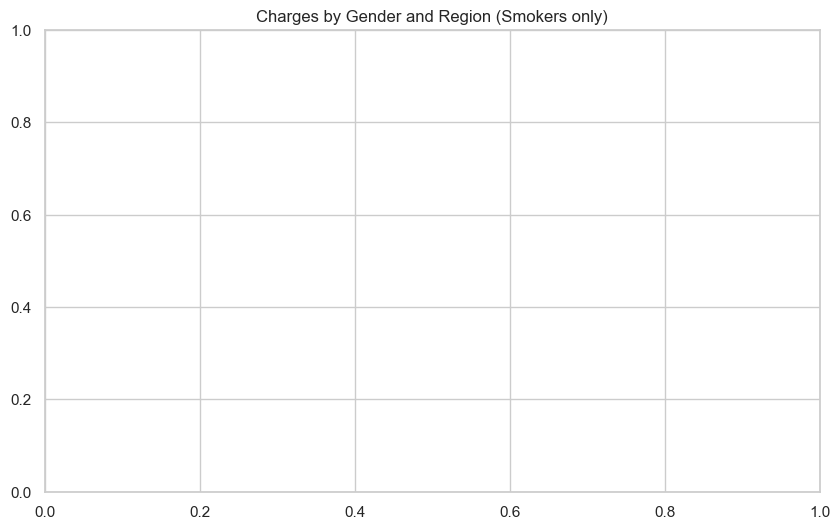

Empty DataFrame
Columns: [region, sex, charges]
Index: []


In [93]:
#What is the impact of gender and region on charges for smokers?
smokers_df = df[df['smoker'] == 'yes']
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='charges', hue='sex', data=smokers_df, palette='Set2')
plt.title("Charges by Gender and Region (Smokers only)")
plt.show()

# Average values table
avg_charges_gender_region = smokers_df.groupby(['region','sex'])['charges'].mean().reset_index()
print(avg_charges_gender_region)



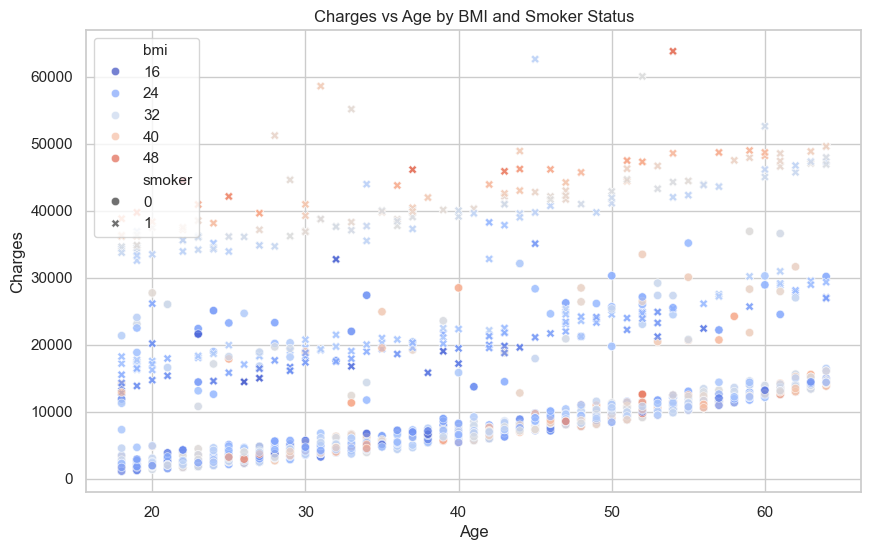

In [94]:
#How do age, BMI, and smoking status together affect insurance cost?
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='charges', hue='bmi', style='smoker', palette='coolwarm', data=df, alpha=0.7)
plt.title("Charges vs Age by BMI and Smoker Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


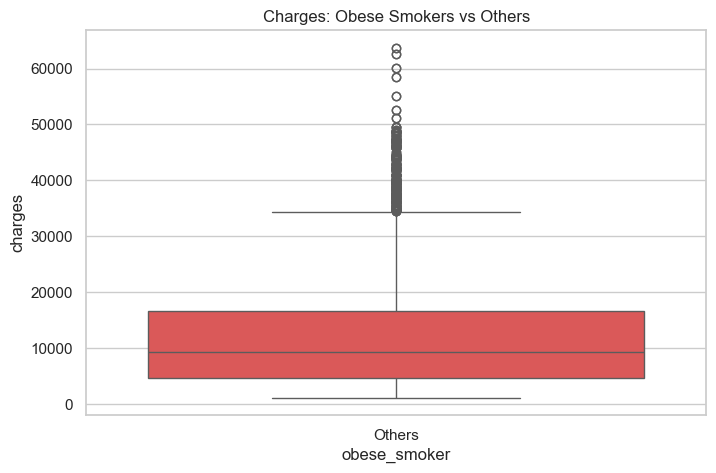

obese_smoker
Others    13261.369959
Name: charges, dtype: float64


In [96]:
# Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?
df['obese_smoker'] = np.where((df['bmi'] > 30) & (df['smoker']=='yes'), 'Obese Smoker', 'Others')

plt.figure(figsize=(8,5))
sns.boxplot(x='obese_smoker', y='charges', data=df, palette=['#EF4444','#3B82F6'])
plt.title("Charges: Obese Smokers vs Others")
plt.show()

# Average charges
avg_charges_obese_smoker = df.groupby('obese_smoker')['charges'].mean()
print(avg_charges_obese_smoker)


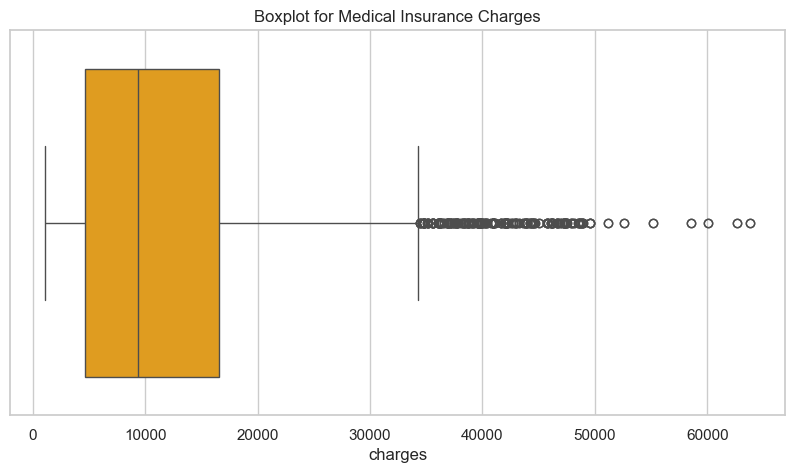

In [97]:
#Outlier Detection

# Are there outliers in the charges column? Who are the individuals paying the highest costs?

plt.figure(figsize=(10,5))
sns.boxplot(x=df['charges'], color='orange')
plt.title("Boxplot for Medical Insurance Charges")
plt.show()

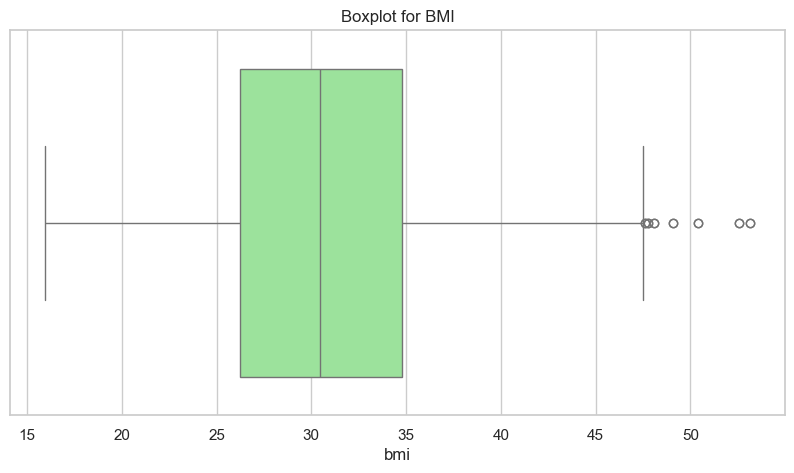

,age,sex,bmi,smoker,charges
14,27,1,42.13,1,39611.7577
18,56,1,40.30,0,10602.3850
83,48,0,41.23,0,11033.6617
116,58,1,49.06,0,11381.3254
170,63,1,41.47,0,13405.3903
...,...,...,...,...,...
2730,56,1,40.30,0,10602.3850
2734,25,0,42.13,0,3238.4357
2735,52,1,41.80,1,47269.8540
2749,26,1,46.53,0,2927.0647


In [98]:
#Are there extreme BMI values that could skew predictions?
plt.figure(figsize=(10,5))
sns.boxplot(x=df['bmi'], color='lightgreen')
plt.title("Boxplot for BMI")
plt.show()

# Check extreme values
extreme_bmi = df[(df['bmi'] < 15) | (df['bmi'] > 40)]
extreme_bmi[['age','sex','bmi','smoker','charges']]



In [100]:
# Correlation Analysis
# a) Correlation between numeric features
corr = df[['age','bmi','children','charges']].corr()
print(corr)

               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


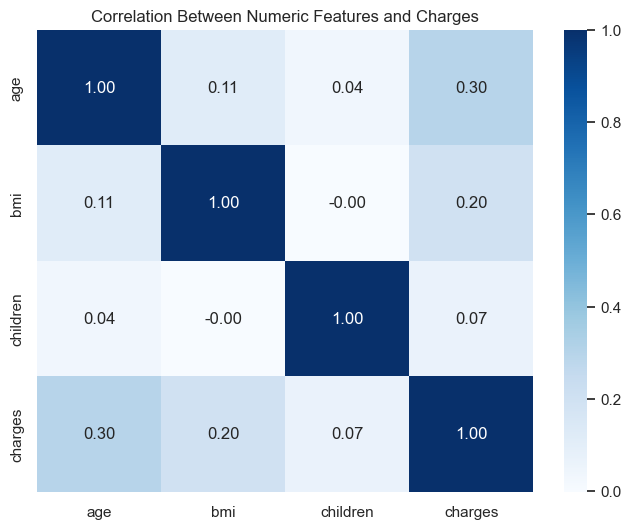

In [102]:
# Which features have the strongest correlation with the target variable (charges)?

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Numeric Features and Charges")
plt.show()


Encode Categorical Variables


In [74]:
le = LabelEncoder()

for col in ['sex', 'smoker', 'region']:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print("Encoding Completed. Sample Data:")
display(df.head())

Encoding Completed. Sample Data:


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Split Data into Training and Testing Sets

In [ ]:
# Splitting the Data into Training and Testing Sets
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (1069, 11)
Testing Data Shape: (268, 11)


Step 2: Model Building and Evaluation

Models to Use

- Linear Regression

- Decision Tree Regressor

- Random Forest Regressor

- Gradient Boosting Regressor

- XGBoost Regressor

Model Building and Evaluation

In [75]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2_Score"])
results_df.sort_values(by="R2_Score", ascending=False, inplace=True)

print("📊 Model Performance Comparison:")
display(results_df)


📊 Model Performance Comparison:


,Model,MAE,RMSE,R2_Score
3,Gradient Boosting,2535.025166,4271.889549,0.900689
2,Random Forest,2563.595463,4648.010440,0.882431
4,XGBoost,2856.995046,5059.140897,0.860713
0,Linear Regression,4177.045561,5956.342894,0.806929
1,Decision Tree,2757.519289,6091.476640,0.798069


Step 3: Choose the Best Model

- The model with the highest R2_Score (closest to 1) and lowest RMSE/MAE is your best-performing model.
- XGBoost or Random Forest gives the best R² — you’ll continue with that as your final model.

Select and Save the Best Model

In [76]:
# Selecting and Saving the Best Model

best_model_name = results_df.iloc[0]['Model']
print(f"Best Performing Model: {best_model_name}")

# Choose the best model dynamically
if best_model_name == "XGBoost":
    best_model = XGBRegressor(random_state=42, objective='reg:squarederror')
elif best_model_name == "Random Forest":
    best_model = RandomForestRegressor(random_state=42)
elif best_model_name == "Gradient Boosting":
    best_model = GradientBoostingRegressor(random_state=42)
elif best_model_name == "Decision Tree":
    best_model = DecisionTreeRegressor(random_state=42)
else:
    best_model = LinearRegression()

# Train and save
best_model.fit(X_train, y_train)
joblib.dump(best_model, "insurance_cost_model.pkl")
print("💾 Model saved successfully as 'insurance_cost_model.pkl'")


Best Performing Model: Gradient Boosting
💾 Model saved successfully as 'insurance_cost_model.pkl'


Test Model Prediction

In [77]:
# Test Model Prediction

model = joblib.load("insurance_cost_model.pkl")

sample = X_test.iloc[0:1]
predicted_cost = model.predict(sample)

print("Predicted Insurance Cost:", round(predicted_cost[0], 2))
print("Actual Insurance Cost:", y_test.iloc[0])


Predicted Insurance Cost: 10571.65
Actual Insurance Cost: 8688.85885


MLflow Integration

In [78]:
# Install MLflow if not already installed
# !pip install mlflow

mlflow.set_experiment("Medical_Insurance_Cost_Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        
        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2_Score", r2)
        
        mlflow.sklearn.log_model(model, artifact_path="model")
        print(f"✅ Logged {name} model with R2 Score: {r2:.4f}")



2025/10/26 21:25:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:25:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Linear Regression model with R2 Score: 0.8069


2025/10/26 21:25:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:25:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Decision Tree model with R2 Score: 0.7981


2025/10/26 21:25:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:25:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Random Forest model with R2 Score: 0.8824


2025/10/26 21:25:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:26:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Gradient Boosting model with R2 Score: 0.9007


2025/10/26 21:26:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:26:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged XGBoost model with R2 Score: 0.8607


In [70]:
# Start MLflow experiment
mlflow.set_experiment("Medical_Insurance_Cost_Prediction")

for name, model in models.items():
    with mlflow.start_run(run_name=name):
        
        # Log hyperparameters if available
        if hasattr(model, "get_params"):
            mlflow.log_params(model.get_params())
        
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Log metrics
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2_Score", r2)
        
        # Log the model
        mlflow.sklearn.log_model(model, artifact_path="model")
        
        print(f"✅ Logged {name} model with R2 Score: {r2:.4f}")


2025/10/26 21:17:03 INFO mlflow.tracking.fluent: Experiment with name 'Medical_Insurance_Cost_Prediction' does not exist. Creating a new experiment.
2025/10/26 21:17:03 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

E

✅ Logged Linear Regression model with R2 Score: 0.8069


2025/10/26 21:17:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:17:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Decision Tree model with R2 Score: 0.7981


2025/10/26 21:17:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:17:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Random Forest model with R2 Score: 0.8824


2025/10/26 21:17:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:18:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Gradient Boosting model with R2 Score: 0.9007


2025/10/26 21:18:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:18:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged XGBoost model with R2 Score: 0.8607


Register the Best Model in MLflow

In [79]:
with mlflow.start_run(run_name=f"Best_Model_{best_model_name}"):
    best_model.fit(X_train, y_train)
    
    best_y_pred = best_model.predict(X_test)
    mlflow.log_metric("MAE", mean_absolute_error(y_test, best_y_pred))
    mlflow.log_metric("RMSE", np.sqrt(mean_squared_error(y_test, best_y_pred)))
    mlflow.log_metric("R2_Score", r2_score(y_test, best_y_pred))
    
    mlflow.sklearn.log_model(best_model, artifact_path="best_model", registered_model_name="InsuranceCostModel")
    print(f"🎉 Best model '{best_model_name}' registered successfully in MLflow Model Registry!")


2025/10/26 21:26:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/26 21:26:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'InsuranceCostModel' already exists. Creating a new version of this model...
Created version '2' of model 'InsuranceCostModel'.


🎉 Best model 'Gradient Boosting' registered successfully in MLflow Model Registry!
